<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M3/notebooks/Autoencoder_SDS_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder – an exmaple of advanced neural architectures

![alt text](https://curiousily.com/static/1c805181257678f16d092385fe580f09/7bc11/mushroom_encoder.png)

## We'll start with an exmple from the Keras Blog of the most simple autoencoder

In [6]:
%load_ext tensorboard
import tensorflow as tf

In [9]:
  import os
  import datetime
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [10]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [11]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[tensorboard_callback])

Epoch 1/15
235/235 [==============================] - 3s 11ms/step - loss: 0.2754 - val_loss: 0.1877
Epoch 2/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1702 - val_loss: 0.1530
Epoch 3/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1438 - val_loss: 0.1331
Epoch 4/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1282 - val_loss: 0.1211
Epoch 5/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1182 - val_loss: 0.1130
Epoch 6/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1113 - val_loss: 0.1071
Epoch 7/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1062 - val_loss: 0.1028
Epoch 8/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0996 - val_loss: 0.0972
Epoch 10/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0976 - val_lo

In [ ]:
%tensorboard --logdir logs

In [17]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

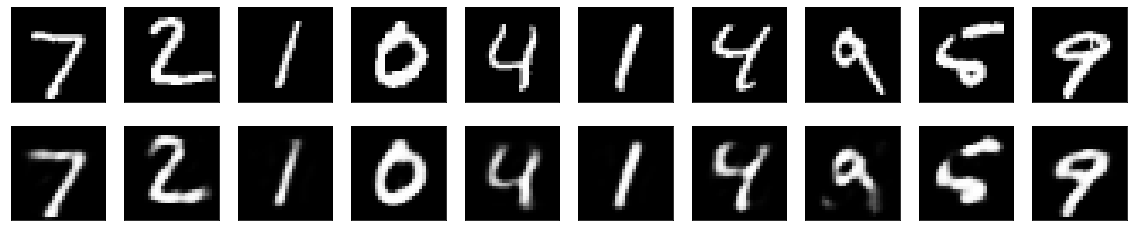

In [18]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Creditcard fraud example

[original article](https://www.datascience.com/blog/fraud-detection-with-tensorflow)

In [20]:
!wget https://github.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/raw/master/data/creditcardfraud.zip

--2021-11-24 08:50:43--  https://github.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/raw/master/data/creditcardfraud.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/master/data/creditcardfraud.zip [following]
--2021-11-24 08:50:43--  https://raw.githubusercontent.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/master/data/creditcardfraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71387154 (68M) [application/zip]
Saving to: ‘creditcardfraud.zip’

creditcardfraud.zip 100

In [21]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("creditcard.csv")

In [24]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [25]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

In [28]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [29]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [30]:
classifier.score(X_test, y_test)

0.9991222218320986

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
np.sum(y_pred)

66

In [33]:
np.sum(y_test)

98

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[56855,     9],
       [   41,    57]])

In [36]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [37]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [38]:

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [39]:
nb_epoch = 5
batch_size = 64

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])



history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test)).history

Epoch 1/5
3554/3554 [==============================] - 8s 2ms/step - loss: 0.8501 - accuracy: 0.5414 - val_loss: 0.8018 - val_accuracy: 0.6554
Epoch 2/5
3554/3554 [==============================] - 7s 2ms/step - loss: 0.7507 - accuracy: 0.6726 - val_loss: 0.7688 - val_accuracy: 0.6788
Epoch 3/5
3554/3554 [==============================] - 8s 2ms/step - loss: 0.7326 - accuracy: 0.6863 - val_loss: 0.7591 - val_accuracy: 0.6950
Epoch 4/5
3554/3554 [==============================] - 7s 2ms/step - loss: 0.7254 - accuracy: 0.6967 - val_loss: 0.7528 - val_accuracy: 0.6978
Epoch 5/5
3554/3554 [==============================] - 8s 2ms/step - loss: 0.7204 - accuracy: 0.7036 - val_loss: 0.7493 - val_accuracy: 0.7067


In [40]:
# We start by making the predictions
predictions = autoencoder.predict(X_test)

In [41]:
# We calculate the two reconstruction errors and make a dataframe with the errors and the class
euclidian = [np.linalg.norm(X_test[i] - predictions[i]) for i in range(len(X_test))]
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

In [42]:
error_df = pd.DataFrame({'mse': mse,
                        'true_class': y_test,
                        'euclidian': euclidian})

In [43]:
# Let's check if the error is different for our top-patents

error_df.groupby(by='true_class').mean()

,mse,euclidian
true_class,,
0,0.697754,3.796477
1,30.318251,23.329004


In [44]:
import seaborn as sns
sns.set()

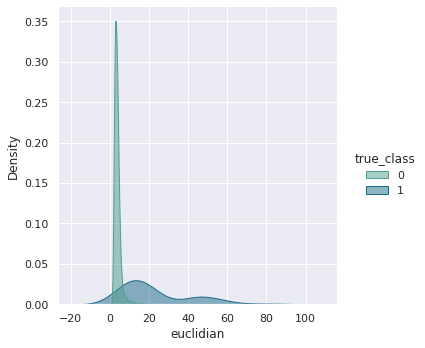

In [45]:
sns.displot(data=error_df, x="euclidian", hue="true_class", kind="kde", fill=True, common_norm=False, palette="crest",
   alpha=.5)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
y_pred = [1 if e > 10 else 0 for e in error_df.euclidian]

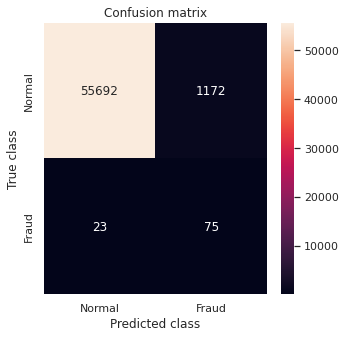

In [48]:
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

LABELS = ["Normal", "Fraud"]

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig('confusion_autoenc_3.8-12.pdf')
#plt.show()